In [674]:
import warnings
warnings.filterwarnings('ignore')

# 1. Introduction

## 1.1 Understanding Stock Market

**1. Stock Market :**  
A Stock market or Share Market is the aggregation of buyers and sellers of stocks which represent ownership claims on business. Investment in the stock market is most often done via [stockbrokerages](https://en.wikipedia.org/wiki/Stockbroker) and [electronic trading platforms] (https://en.wikipedia.org/wiki/Electronic_trading_platform). Investments is usually made with an investment strategy in mind.

Every investor looks for a profit by buying stocks with low price and selling those stocks with high price. The price of stock usually depends on supply demand gap. Following points illustarate how the price of stocks changes.  
1. If more number of buyers want to buy a share than the more number of sellers selling, then sellers are in control then can fix the price of the stock.
2. If number of buyers are less than the number of sellers, then buyers are in control and the can fix the price.  

**2. Stock Index :**  
A Stock index or stock market index, is an index that measures a stock market or a subset of the stock market, that helps investors compare curretn price levels with past prices to calculate market performance.  

The major stock indices in usa are:  
a) [Nasdaq composite](https://en.wikipedia.org/wiki/NASDAQ_Composite)  
b) [S&p 500](https://en.wikipedia.org/wiki/S%26P_500_Index)  
c) [DJIA](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average)  

The major stock market indices in india are:  
a) [BSE Sensex](https://en.wikipedia.org/wiki/BSE_SENSEX)  
b) [NSE Nifty](https://en.wikipedia.org/wiki/NIFTY_50)  

You can understand more about stock market [here](https://www.youtube.com/watch?v=ZCFkWDdmXG8).  

## 1.2 Problem Description

Every stock market index contains low, high, open, closing prices of every day stock prices.  
**LOW:** low indicates the lowest price of the stock on that day.  
**HIGH:** High indicates the highest price of the stock on that day.  
**Open:** Open indicates the opening price of the stock on that day.  
**Close:** Close indicates the closing price of the stock on that day.  

If closig price is greater than selling price then it means sellers are in control. Otherwise, buyers are in control.  

**The main objective in my problem is to predict the closing price of a stock market index.**  

In [675]:
#imports

import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Input
# gloabl params for all matplotlib plots
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
os.listdir('../DataSet/S&P_500/raw_data/')

from tensorflow.keras.layers import Layer, LSTM, Dense, Bidirectional, Flatten
from tensorflow.keras.models import Sequential
import tensorflow.keras.backend as K
import datetime

tf.random.set_seed(1)

# 1. Understanding Dataset

In [676]:
data_path = '../DataSet/'
raw_data = pd.read_csv(data_path + 'nasdaq/raw_data/finance.txt')
raw_data["Date"] = pd.to_datetime(raw_data["Date"])
print("Top 5 rows of the dataset:")
raw_data.head()

Top 5 rows of the dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,1991-01-02,373.000000,373.500000,371.799988,372.200012,372.200012,92020000
1,1991-01-03,371.200012,371.799988,367.399994,367.500000,367.500000,108390000
2,1991-01-04,366.500000,367.899994,365.899994,367.200012,367.200012,103830000
3,1991-01-07,363.500000,365.799988,360.100006,360.200012,360.200012,109460000
4,1991-01-08,359.100006,360.500000,358.200012,359.000000,359.000000,111730000


In [677]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7424 entries, 0 to 7423
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7424 non-null   datetime64[ns]
 1   Open       7424 non-null   float64       
 2   High       7424 non-null   float64       
 3   Low        7424 non-null   float64       
 4   Close      7424 non-null   float64       
 5   Adj Close  7424 non-null   float64       
 6   Volume     7424 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 406.1 KB


In [678]:
print("number of data points:", raw_data.shape[0])

number of data points: 7424


# 2 Descriptive Analysis

In [679]:
for column in raw_data.columns:
    print("Descriptive statistics of " + column + ":")
    print(raw_data[column].describe())
    print('\n')

Descriptive statistics of Date:
count                    7424
unique                   7424
top       2017-08-21 00:00:00
freq                        1
first     1991-01-02 00:00:00
last      2020-06-19 00:00:00
Name: Date, dtype: object


Descriptive statistics of Open:
count     7424.000000
mean      2854.273284
std       2071.833698
min        354.899994
25%       1440.725036
50%       2238.505005
75%       3756.090027
max      10042.129883
Name: Open, dtype: float64


Descriptive statistics of High:
count     7424.000000
mean      2873.521296
std       2083.938531
min        357.399994
25%       1454.302521
50%       2256.135009
75%       3791.617493
max      10086.889648
Name: High, dtype: float64


Descriptive statistics of Low:
count    7424.000000
mean     2832.226635
std      2058.699329
min       353.000000
25%      1419.029999
50%      2218.710083
75%      3711.435059
max      9962.580078
Name: Low, dtype: float64


Descriptive statistics of Close:
count     7424.000000
mean

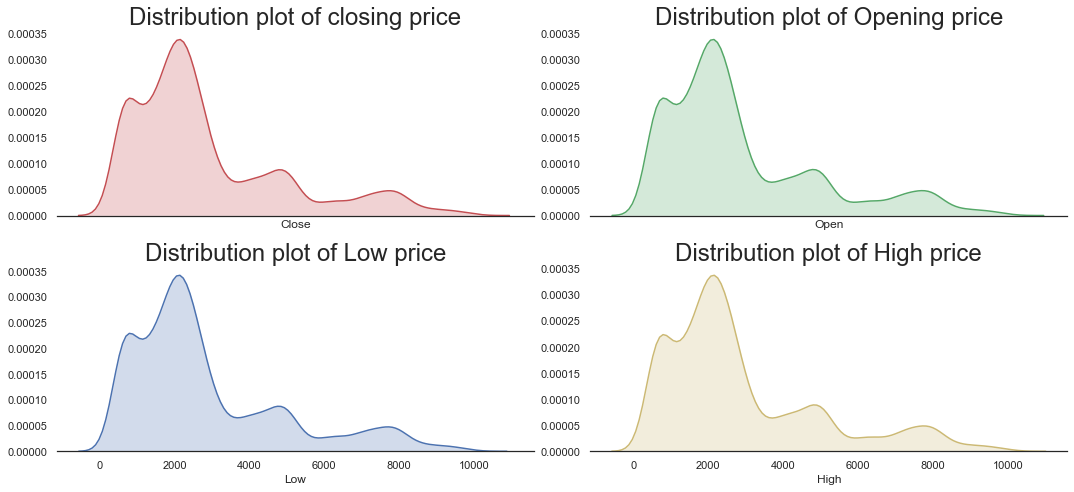

In [680]:
#https://seaborn.pydata.org/examples/distplot_options.html
sns.set(style="white", color_codes=True)
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=True)

sns.despine(left=True)

sns.distplot(raw_data['Close'], hist=False, color="r",\
             kde_kws={"shade": True}, ax=axes[0, 0]).set_title("Distribution plot of closing price", size = 24)

sns.distplot(raw_data['Open'], hist=False, color = "g", \
             kde_kws={"shade": True}, ax=axes[0, 1]).set_title("Distribution plot of Opening price", size = 24)

sns.distplot(raw_data['Low'], hist=False, color="b", \
             kde_kws={"shade": True}, ax=axes[1, 0]).set_title("Distribution plot of Low price", size = 24)

sns.distplot(raw_data['High'], hist=False, color="y", \
             kde_kws={"shade": True}, ax=axes[1, 1]).set_title("Distribution plot of High price", size = 24)
plt.tight_layout()

### Observations

1. After Observing the distribution plots and descriptive statistics of stock prices, It seems they are highly correlated and most of the stock prices are around 2000 dollars.
2. Maximum stock price is 10000 dollars.

# 3. Feature Engineering

## 3.1 Date related Features

In [681]:
processed_data = raw_data.copy()
processed_data['year'] = processed_data["Date"].dt.year                     #generating year
processed_data['month'] = processed_data['Date'].dt.month                   #generating month
processed_data['day'] = processed_data['Date'].dt.day                       #genearating day
processed_data['dayofweek_num'] = processed_data['Date'].dt.dayofweek       #generating week day number
processed_data['dayofweek_name'] = processed_data['Date'].dt.day_name()     #generating week day name

processed_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,dayofweek_num,dayofweek_name
0,1991-01-02,373.000000,373.500000,371.799988,372.200012,372.200012,92020000,1991,1,2,2,Wednesday
1,1991-01-03,371.200012,371.799988,367.399994,367.500000,367.500000,108390000,1991,1,3,3,Thursday
2,1991-01-04,366.500000,367.899994,365.899994,367.200012,367.200012,103830000,1991,1,4,4,Friday
3,1991-01-07,363.500000,365.799988,360.100006,360.200012,360.200012,109460000,1991,1,7,0,Monday
4,1991-01-08,359.100006,360.500000,358.200012,359.000000,359.000000,111730000,1991,1,8,1,Tuesday


## 3.2 Buyers are sellers are control features  

In stock market if closig price is greater than opening price it means sellers are in control. Otherwise, buyers are in control. let's add this feature to the dataset.  

In [682]:
processed_data['control_stock'] = processed_data.apply(
    lambda x: 'sellersControl' if (x['Close'] > x['Open'])  else 'buyersControl' , axis = 1
    )      #generating control_stock column whcih gives whether buyers are in control or sellers are in control on each day

In [683]:
#storing the processed data in the local directory
outdir = data_path + 'nasdaq/processed_data'
outname = 'processed_finance.csv'
if not os.path.exists(outdir):
    os.mkdir(outdir)
fullname = os.path.join(outdir, outname)
processed_data.to_csv(fullname)

# 4. Exploratory Analysis

## 4.1 Exploratory Analysis on raw data

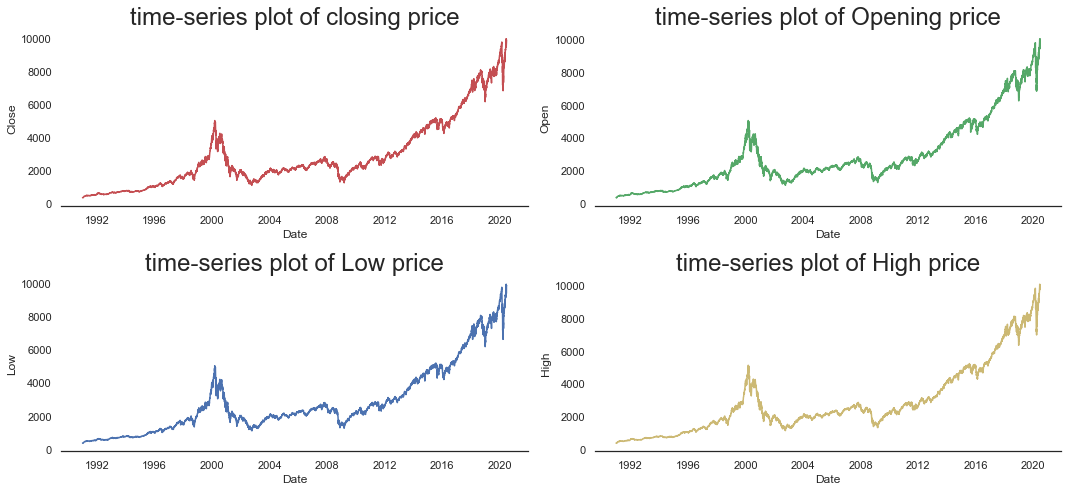

In [684]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(15, 7))
sns.despine(left=True)

sns.lineplot(raw_data['Date'], raw_data['Close'], color="r", \
             ax=axes[0, 0]).set_title("time-series plot of closing price", size = 24)

sns.lineplot(raw_data['Date'], raw_data['Open'], color = "g", \
             ax=axes[0, 1]).set_title("time-series plot of Opening price", size = 24)

sns.lineplot(raw_data['Date'], raw_data['Low'], color="b", \
             ax=axes[1, 0]).set_title("time-series plot of Low price", size = 24)

sns.lineplot(raw_data['Date'], raw_data['High'], color="y", \
             ax=axes[1, 1]).set_title("time-series plot of High price", size = 24)


plt.tight_layout()

## 4.2 Exploratory Analysis on processed data  

### 4.2.1 Distribution of sellers control vs buyers control

In [685]:
#https://stackoverflow.com/questions/35692781/python-plotting-percentage-in-seaborn-bar-plot
def without_hue(plot, feature1):
    """
    This function labels the percentage on count plots
    
    parameters:
        plot(plot object): matplotlib plot object
        feature1(array): array of counts
    
    returns:
        doesn't return anything but annotates the percentage on count plot
    
    """
    total = feature1.sum()
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)

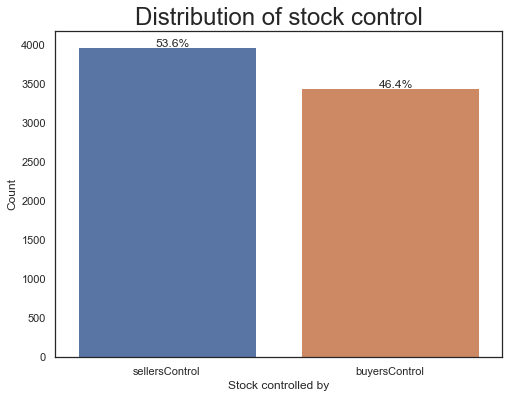

In [686]:
counts = processed_data.control_stock.value_counts()
df_counts = pd.DataFrame(counts).reset_index()
df_counts.columns = ['control_stock', 'count']
ax = sns.barplot(x = 'control_stock', y='count', data = df_counts)
plt.xlabel('Stock controlled by', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of stock control', size = 24)
without_hue(ax, df_counts[['count']].values)

### Observations

1. By observing the count plot we can see that most of the times sellers are in control compared to buyers.

#### Finding years where distribution of stock control differs from the original distribution

In [687]:
#group by year of stock control
year_control = processed_data[['year', 'control_stock']].groupby('year').control_stock.value_counts()
df_year_control = pd.DataFrame(year_control)
df_year_control.columns = ['count']
df_year_control.reset_index(inplace = True)

In [688]:
def return_years(df):
    """
    This function purpose is to find the years where the distribution of stock control differs from the original distribution
    
    parameters:
        df(dataframe): This dataframe contains the stock control grouped by year
    
    returns:
        array: returns the array of years
    
    """
    year_values = []
    for year in df['year'].unique():
        temp_df = df[df['year'] == year]
        if temp_df[temp_df['control_stock'] == 'sellersControl']['count'].values[0] < \
            temp_df[temp_df['control_stock'] == 'buyersControl']['count'].values[0]:
            year_values.append(year)
    return year_values

In [689]:
years = return_years(df_year_control)

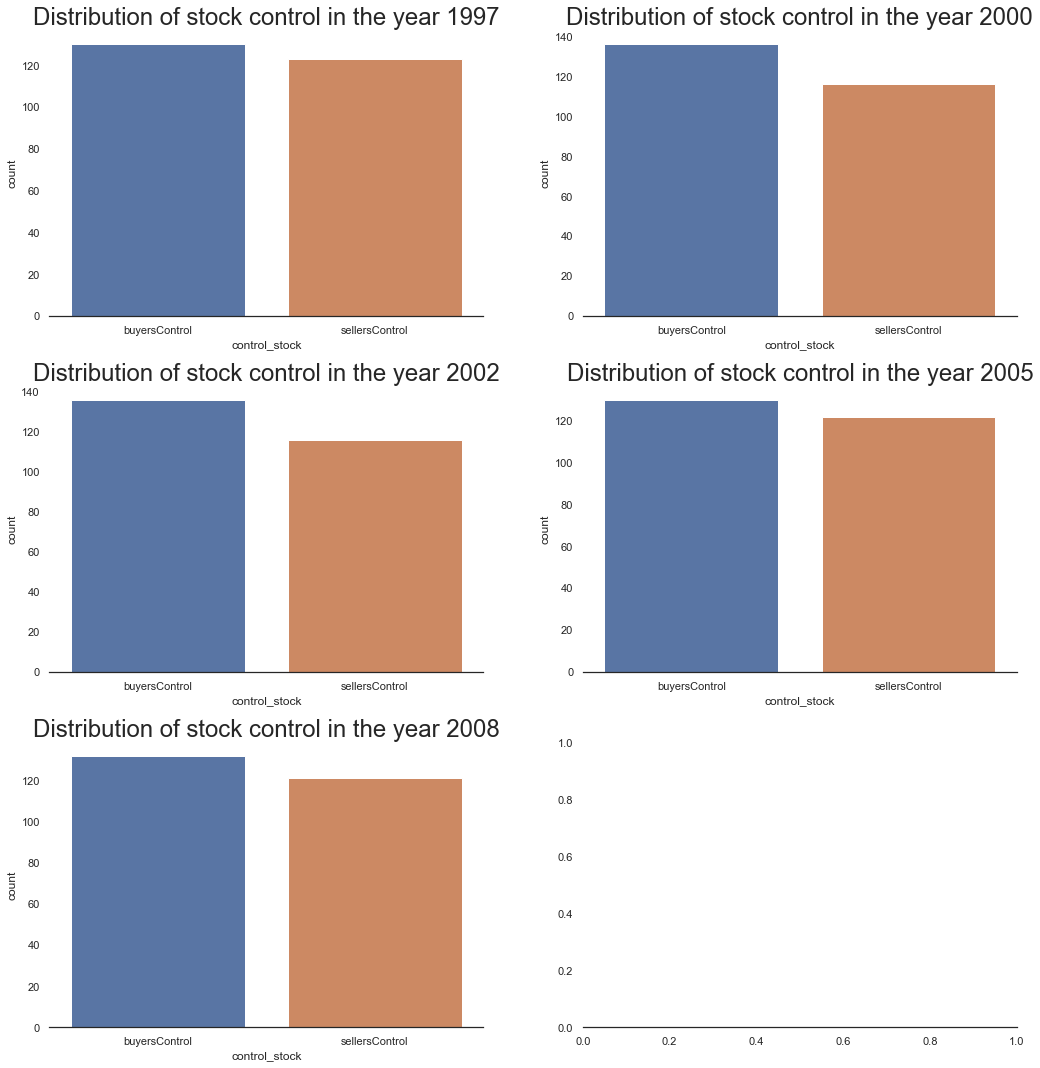

In [690]:
# Set up the matplotlib figure
f, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.despine(left=True)

sns.barplot(x = 'control_stock', y='count', \
            data = df_year_control[df_year_control['year'] == years[0]], \
            ax = axes[0,0]).set_title("Distribution of stock control in the year {}".format(years[0]), size = 24)
                                                                                                                                  
without_hue(ax, df_counts[['count']].values)

sns.barplot(x = 'control_stock', y='count',\
            data = df_year_control[df_year_control['year'] == years[1]],\
            ax = axes[0,1]).set_title("Distribution of stock control in the year {}".format(years[1]), size = 24)


sns.barplot(x = 'control_stock', y='count', \
            data = df_year_control[df_year_control['year'] == years[2]],\
            ax = axes[1,0]).set_title("Distribution of stock control in the year {}".format(years[2]), size = 24)


sns.barplot(x = 'control_stock', y='count', \
            data = df_year_control[df_year_control['year'] == years[3]], \
            ax = axes[1,1]).set_title("Distribution of stock control in the year {}".format(years[3]), size = 24)


sns.barplot(x = 'control_stock', y='count', \
            data = df_year_control[df_year_control['year'] == years[4]], \
            ax = axes[2,0]).set_title("Distribution of stock control in the year {}".format(years[4]), size = 24)

plt.tight_layout()

#### Observations

1. After exploring the year-wise stock-control, it seems that the years **1997, 2000, 2002, 2005, 2008** are in favour of buyers comapred to sellers.

#### Finding months where distribution of stock control differs from the original distribution

In [691]:
# group stock control by month-wise
month_control = processed_data[['month', 'control_stock']].groupby('month').control_stock.value_counts()
df_month_control = pd.DataFrame(month_control)
df_month_control.columns = ['count']
df_month_control.reset_index(inplace = True)

In [692]:
def return_months(df):
    """
    This function purpose is to find the months where the distribution of stock control differs from the original distribution
    
    parameters:
        df(dataframe): This dataframe contains the stock control grouped by months
    
    returns:
        array: returns the array of months
    
    """
    month_values = []
    for month in df['month'].unique():
        temp_df = df[df['month'] == month]
        if temp_df[temp_df['control_stock'] == 'sellersControl']['count'].values[0] < \
            temp_df[temp_df['control_stock'] == 'buyersControl']['count'].values[0]:
            month_values.append(month)
    return month_values

In [693]:
months = return_months(df_month_control)

In [694]:
print(months)

[]


#### Observations

1. After exploring month-wise it seems that the month wise there are no months where the distribution of stock control differs from the orignal distribution.  

#### Finding days where distribution of stock control differs from the original distribution

In [695]:
# group stock control by month-wise
day_control = processed_data[['dayofweek_name', 'control_stock']].groupby('dayofweek_name').control_stock.value_counts()
df_day_control = pd.DataFrame(day_control)
df_day_control.columns = ['count']
df_day_control.reset_index(inplace = True)

In [696]:
def return_days(df):
    """
    This function purpose is to find the days where the distribution of stock control differs from the original distribution
    
    parameters:
        df(dataframe): This dataframe contains the stock control grouped by days
    
    returns:
        array: returns the array of days
    
    """
    day_values = []
    for day in df['dayofweek_name'].unique():
        temp_df = df[df['dayofweek_name'] == day]
        if temp_df[temp_df['control_stock'] == 'sellersControl']['count'].values[0] < \
            temp_df[temp_df['control_stock'] == 'buyersControl']['count'].values[0]:
            day_values.append(day)
    return day_values

In [697]:
days = return_days(df_day_control)

In [698]:
print(days)

[]


#### Observations

1. After exploring day-wise it seems that the day-wise there are no days where the distribution of stock control differs from the orignal distribution  

# 5. Predictive Analytics

## 5.1  Data Pre-processing

In [699]:
# Features
features_considered = ['Open', 'High', 'Low', 'Adj Close', 'Close']

features = df[features_considered]
features.index = df['Date']
features.head()

,Open,High,Low,Adj Close,Close
Date,,,,,
1991-01-02,373.000000,373.500000,371.799988,372.200012,372.200012
1991-01-03,371.200012,371.799988,367.399994,367.500000,367.500000
1991-01-04,366.500000,367.899994,365.899994,367.200012,367.200012
1991-01-07,363.500000,365.799988,360.100006,360.200012,360.200012
1991-01-08,359.100006,360.500000,358.200012,359.000000,359.000000


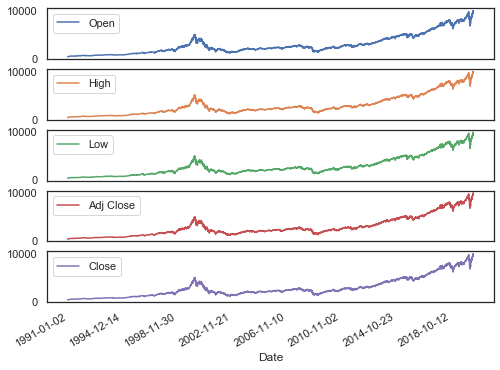

In [700]:
_ = features.plot(subplots = True)

In [701]:
dataset = features.values

In [702]:
TRAIN_SPLIT = int(features.shape[0] * 0.65) #getting index for traind dataset
VAL_SPLIT = int(features.shape[0] * 0.85)  #getting index for validation dataset

In [703]:
# Standardize data

dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

dataset = (dataset-data_mean)/data_std

In [704]:
def multivariate_data(dataset, target, start_index, end_index, history_size, train_flag = False):
    
    """
    This function purpose is to returing the dataset and the labels
    
    parameters:
        dataset(nd-array): It contains the daily stock data
        target(1d-array): It contains the daily closing prices
        start_index(int): It contain the starting point of the dataset to starrt splitting
        end_index(int or None): It contains the ending point os the dataset to end splitting
        history_size(int): It contains the time-steps (window-size)
        train_flag(boolean): It contains boolean value which represents whether the data is to split for train or validation dataset
    
    returns:
        data(array): final dataset read for training or validating
        labels(array): array contains the labels for trianing dataset
    
    """
    data = []
    labels = []

    if train_flag is True:
        start_index = start_index + history_size
    
    if end_index is None:
        end_index = len(dataset) 
    
    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        data.append(dataset[indices])

        labels.append(target[i]) 

    return np.array(data), np.array(labels)

In [705]:
# Generate data
past_history = 10

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, -1], 0,
                                                   TRAIN_SPLIT, past_history, train_flag = True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, -1],
                                               TRAIN_SPLIT, VAL_SPLIT, past_history, train_flag = False)
x_test_single, y_test_single = multivariate_data(dataset, dataset[:, -1], VAL_SPLIT, 
                                                 None, past_history, train_flag = False)

print("train data shape:", x_train_single.shape)
print("train label shape:", y_train_single.shape)
print("validation data shape:", x_val_single.shape)
print("validation label shape:", y_val_single.shape)
print("test data shape:", x_test_single.shape)
print("test label shape:", y_test_single.shape)

train data shape: (4815, 10, 5)
train label shape: (4815,)
validation data shape: (1485, 10, 5)
validation label shape: (1485,)
test data shape: (1114, 10, 5)
test label shape: (1114,)


In [706]:
#storing the final datasets in .npy files so that can reuse in another notebooks

outdir = data_path + 'nasdaq/final_data/'
x_train_outname = 'train/x_train_normalised.npy'
y_train_outname = 'train/y_train_normalised.npy'

x_val_outname = 'validation/x_val_normalised.npy'
y_val_outname = 'validation/y_val_normalised.npy'

x_test_outname = 'test/x_test_normalised.npy'
y_test_outname = 'test/y_test_normalised.npy'

data_mean_outname = 'standardization/data_mean.npy'
data_std_outname = 'standardization/data_std.npy'

if not os.path.exists(outdir):
    os.mkdir(outdir)
full_x_train = os.path.join(outdir, x_train_outname)
full_y_train = os.path.join(outdir, y_train_outname)

full_x_val = os.path.join(outdir, x_val_outname)
full_y_val = os.path.join(outdir, y_val_outname)

full_x_test = os.path.join(outdir, x_test_outname)
full_y_test = os.path.join(outdir, y_test_outname)

full_data_mean = os.path.join(outdir, data_mean_outname)
full_data_std = os.path.join(outdir, data_std_outname)

#https://thispointer.com/how-to-save-numpy-array-to-a-csv-file-using-numpy-savetxt-in-python/
np.save(full_x_train, [x_train_single])
np.save(full_y_train, [y_train_single])

np.save(full_x_val, [x_val_single])
np.save(full_y_val, [y_val_single])

np.save(full_x_test, [x_test_single])
np.save(full_y_test, [y_test_single])

np.save(full_data_mean, [data_mean])
np.save(full_data_std, [data_std])

# 5.2 AT-LSTM model

In [707]:
#https://www.tensorflow.org/tensorboard/get_started

# defining log_dir and tensorboard_call back for storing log files
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [708]:
#Attention model

class attention(Layer):
    """
    This is an extended attention layer for our custom implemention
    
    """
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        """
        The function to define weights and bias.
        
        parameters:
            inpu_shape(dimenstion of the array): It's the shape of previous LSTM output
            
        returns:
            doesn't return anything
        
        """
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        """
        This function calculates the attention weights of the input and gives the output after weighted input
        
        parameters:
            x(LSTM output): It's the previous LSTM output
        
        returns:
            returns the attention weighted LSTM output
        
        """
        #print("X_shape", x.shape)
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        #print("et_shape", et.shape)
        at=K.softmax(et)
        #print("at_shape_1", at.shape)
        at=K.expand_dims(at,axis=-1)
        #print("at_shape_2", at.shape)
        output=x*at
        #print("output_shape", output.shape)
        #return(output)
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [709]:
def create_model(time_steps, num_features, num_neurons_lstm):
    
    """
    This function creates the AT-LSTM model
    
    parameters:
        time_steps(int): window-size for model creation.
        num_features(int): number of features contains in the dataset.
        num_neurons_lstm(int): number of neurons contains for LSTM model.
    
    returns:
        returns the deep_learning model created using tensorflow.
    """
    
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)
    # define model
    model = Sequential()
    model.add(LSTM(num_neurons_lstm, activation='relu', return_sequences = True, input_shape=(time_steps, num_features)))
    model.add(attention())
    model.add(Dense(1))
    model.compile(optimizer=opt, loss='mae', metrics = ['mape'])
    
    return model
    

In [710]:
model = create_model(time_steps = 10, num_features = 5, num_neurons_lstm = 8)

In [711]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10, 8)             448       
_________________________________________________________________
attention_2 (attention)      (None, 8)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 475
Trainable params: 475
Non-trainable params: 0
_________________________________________________________________


In [712]:
# Train and evaluate
EPOCHS = 600
batch_size = 50
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
model.fit(x_train_single, y_train_single, validation_data = (x_val_single, y_val_single ), 
          epochs=EPOCHS, batch_size = batch_size, callbacks=[tensorboard_callback])

Epoch 1/600
97/97 [==============================] - 1s 14ms/step - loss: 0.1106 - mape: 54.5457 - val_loss: 0.2098 - val_mape: 10.8367
Epoch 2/600
97/97 [==============================] - 1s 7ms/step - loss: 0.0577 - mape: 42.2901 - val_loss: 0.0644 - val_mape: 4.0745
Epoch 3/600
97/97 [==============================] - 1s 7ms/step - loss: 0.0550 - mape: 39.9032 - val_loss: 0.1438 - val_mape: 7.3887
Epoch 4/600
97/97 [==============================] - 1s 7ms/step - loss: 0.0523 - mape: 36.9445 - val_loss: 0.0821 - val_mape: 4.7001
Epoch 5/600
97/97 [==============================] - 1s 7ms/step - loss: 0.0487 - mape: 35.4957 - val_loss: 0.0754 - val_mape: 4.4173
Epoch 6/600
97/97 [==============================] - 1s 7ms/step - loss: 0.0467 - mape: 33.2896 - val_loss: 0.0655 - val_mape: 3.8316
Epoch 7/600
97/97 [==============================] - 1s 7ms/step - loss: 0.0459 - mape: 32.7434 - val_loss: 0.1103 - val_mape: 5.1224
Epoch 8/600
97/97 [==============================] - 1s 7ms/

97/97 [==============================] - 1s 6ms/step - loss: 0.0290 - mape: 21.5898 - val_loss: 0.0691 - val_mape: 3.2547
Epoch 61/600
97/97 [==============================] - 1s 7ms/step - loss: 0.0284 - mape: 20.4710 - val_loss: 0.0422 - val_mape: 2.3733
Epoch 62/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0290 - mape: 21.0568 - val_loss: 0.0489 - val_mape: 2.7496
Epoch 63/600
97/97 [==============================] - 1s 7ms/step - loss: 0.0284 - mape: 20.6222 - val_loss: 0.0420 - val_mape: 2.5666
Epoch 64/600
97/97 [==============================] - 1s 7ms/step - loss: 0.0288 - mape: 20.8050 - val_loss: 0.0844 - val_mape: 3.8486
Epoch 65/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0299 - mape: 21.3831 - val_loss: 0.0368 - val_mape: 2.2239
Epoch 66/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0298 - mape: 20.1239 - val_loss: 0.0431 - val_mape: 2.4135
Epoch 67/600
97/97 [==============================] - 1s 7ms/step - 

97/97 [==============================] - 1s 6ms/step - loss: 0.0271 - mape: 19.5495 - val_loss: 0.0585 - val_mape: 2.8315
Epoch 121/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0274 - mape: 20.3482 - val_loss: 0.0363 - val_mape: 2.1606
Epoch 122/600
97/97 [==============================] - 1s 7ms/step - loss: 0.0286 - mape: 20.3056 - val_loss: 0.0353 - val_mape: 2.1278
Epoch 123/600
97/97 [==============================] - 1s 7ms/step - loss: 0.0281 - mape: 22.1530 - val_loss: 0.0505 - val_mape: 2.6451
Epoch 124/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0287 - mape: 20.5970 - val_loss: 0.0380 - val_mape: 2.3488
Epoch 125/600
97/97 [==============================] - 1s 7ms/step - loss: 0.0284 - mape: 20.4339 - val_loss: 0.0950 - val_mape: 4.1250
Epoch 126/600
97/97 [==============================] - 1s 7ms/step - loss: 0.0283 - mape: 19.9794 - val_loss: 0.0538 - val_mape: 2.8871
Epoch 127/600
97/97 [==============================] - 1s 6ms/

97/97 [==============================] - 1s 6ms/step - loss: 0.0276 - mape: 19.5194 - val_loss: 0.0987 - val_mape: 4.6319
Epoch 181/600
97/97 [==============================] - 1s 7ms/step - loss: 0.0278 - mape: 19.0967 - val_loss: 0.0760 - val_mape: 3.4748
Epoch 182/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0283 - mape: 19.9062 - val_loss: 0.0413 - val_mape: 2.3795
Epoch 183/600
97/97 [==============================] - 1s 7ms/step - loss: 0.0284 - mape: 20.2137 - val_loss: 0.0478 - val_mape: 2.4952
Epoch 184/600
97/97 [==============================] - 1s 7ms/step - loss: 0.0283 - mape: 20.1358 - val_loss: 0.0382 - val_mape: 2.2896
Epoch 185/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0280 - mape: 19.5234 - val_loss: 0.0417 - val_mape: 2.3278
Epoch 186/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0283 - mape: 19.1661 - val_loss: 0.0664 - val_mape: 3.4173
Epoch 187/600
97/97 [==============================] - 1s 6ms/

97/97 [==============================] - 1s 6ms/step - loss: 0.0291 - mape: 19.9979 - val_loss: 0.0653 - val_mape: 3.4011
Epoch 241/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0283 - mape: 20.2799 - val_loss: 0.0662 - val_mape: 3.1660
Epoch 242/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0276 - mape: 19.6683 - val_loss: 0.0745 - val_mape: 3.4072
Epoch 243/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0288 - mape: 21.8013 - val_loss: 0.0843 - val_mape: 3.9005
Epoch 244/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0274 - mape: 19.2753 - val_loss: 0.0410 - val_mape: 2.5267
Epoch 245/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0273 - mape: 19.7847 - val_loss: 0.0992 - val_mape: 4.6199
Epoch 246/600
97/97 [==============================] - 1s 7ms/step - loss: 0.0282 - mape: 18.9854 - val_loss: 0.0516 - val_mape: 2.6806
Epoch 247/600
97/97 [==============================] - 1s 6ms/

97/97 [==============================] - 1s 8ms/step - loss: 0.0327 - mape: 20.2307 - val_loss: 0.0747 - val_mape: 4.4966
Epoch 301/600
97/97 [==============================] - 1s 8ms/step - loss: 0.0309 - mape: 19.9439 - val_loss: 0.0591 - val_mape: 3.2595
Epoch 302/600
97/97 [==============================] - 1s 8ms/step - loss: 0.0302 - mape: 19.7930 - val_loss: 0.0550 - val_mape: 3.1238
Epoch 303/600
97/97 [==============================] - 1s 8ms/step - loss: 0.0302 - mape: 19.4094 - val_loss: 0.0448 - val_mape: 2.7494
Epoch 304/600
97/97 [==============================] - 1s 8ms/step - loss: 0.0297 - mape: 19.3913 - val_loss: 0.0423 - val_mape: 2.5294
Epoch 305/600
97/97 [==============================] - 1s 9ms/step - loss: 0.0292 - mape: 19.6019 - val_loss: 0.0489 - val_mape: 2.6934
Epoch 306/600
97/97 [==============================] - 1s 8ms/step - loss: 0.0290 - mape: 18.8202 - val_loss: 0.0559 - val_mape: 2.8824
Epoch 307/600
97/97 [==============================] - 1s 8ms/

97/97 [==============================] - 1s 8ms/step - loss: 0.0277 - mape: 19.9593 - val_loss: 0.0395 - val_mape: 2.2663
Epoch 361/600
97/97 [==============================] - 1s 9ms/step - loss: 0.0272 - mape: 19.5548 - val_loss: 0.0364 - val_mape: 2.1699
Epoch 362/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0275 - mape: 20.3849 - val_loss: 0.0392 - val_mape: 2.2971
Epoch 363/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0272 - mape: 18.8794 - val_loss: 0.0378 - val_mape: 2.2293
Epoch 364/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0283 - mape: 18.8442 - val_loss: 0.0481 - val_mape: 2.5409
Epoch 365/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0281 - mape: 18.1873 - val_loss: 0.0590 - val_mape: 3.0075
Epoch 366/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0279 - mape: 18.5154 - val_loss: 0.0836 - val_mape: 4.1953
Epoch 367/600
97/97 [==============================] - 1s 7ms/

97/97 [==============================] - 1s 6ms/step - loss: 0.0272 - mape: 18.9880 - val_loss: 0.0532 - val_mape: 2.7299
Epoch 421/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0271 - mape: 18.6767 - val_loss: 0.0380 - val_mape: 2.2615
Epoch 422/600
97/97 [==============================] - 1s 8ms/step - loss: 0.0280 - mape: 18.4590 - val_loss: 0.0360 - val_mape: 2.1531
Epoch 423/600
97/97 [==============================] - 1s 7ms/step - loss: 0.0270 - mape: 18.3207 - val_loss: 0.0368 - val_mape: 2.1883
Epoch 424/600
97/97 [==============================] - 1s 7ms/step - loss: 0.0272 - mape: 19.0148 - val_loss: 0.0499 - val_mape: 2.6671
Epoch 425/600
97/97 [==============================] - 1s 7ms/step - loss: 0.0269 - mape: 18.1829 - val_loss: 0.0409 - val_mape: 2.3094
Epoch 426/600
97/97 [==============================] - 1s 7ms/step - loss: 0.0271 - mape: 18.5533 - val_loss: 0.0563 - val_mape: 2.9301
Epoch 427/600
97/97 [==============================] - 1s 7ms/

97/97 [==============================] - 1s 7ms/step - loss: 0.0265 - mape: 18.7606 - val_loss: 0.0605 - val_mape: 2.8709
Epoch 481/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0271 - mape: 18.6956 - val_loss: 0.0499 - val_mape: 2.8011
Epoch 482/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0285 - mape: 18.0843 - val_loss: 0.0380 - val_mape: 2.2736
Epoch 483/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0265 - mape: 18.5256 - val_loss: 0.0783 - val_mape: 3.5678
Epoch 484/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0276 - mape: 19.6526 - val_loss: 0.0733 - val_mape: 3.3017
Epoch 485/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0276 - mape: 18.7309 - val_loss: 0.0373 - val_mape: 2.1931
Epoch 486/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0266 - mape: 18.1218 - val_loss: 0.0483 - val_mape: 2.5350
Epoch 487/600
97/97 [==============================] - 1s 7ms/

97/97 [==============================] - 1s 6ms/step - loss: 0.0264 - mape: 18.6071 - val_loss: 0.0440 - val_mape: 2.3575
Epoch 541/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0270 - mape: 18.6125 - val_loss: 0.0496 - val_mape: 2.6083
Epoch 542/600
97/97 [==============================] - 1s 7ms/step - loss: 0.0275 - mape: 19.6544 - val_loss: 0.0379 - val_mape: 2.2213
Epoch 543/600
97/97 [==============================] - 1s 7ms/step - loss: 0.0272 - mape: 19.1918 - val_loss: 0.0374 - val_mape: 2.2408
Epoch 544/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0271 - mape: 18.6753 - val_loss: 0.0399 - val_mape: 2.4482
Epoch 545/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0270 - mape: 18.8847 - val_loss: 0.0588 - val_mape: 3.2219
Epoch 546/600
97/97 [==============================] - 1s 6ms/step - loss: 0.0264 - mape: 18.8610 - val_loss: 0.0441 - val_mape: 2.4714
Epoch 547/600
97/97 [==============================] - 1s 7ms/

97/97 [==============================] - 1s 7ms/step - loss: 0.0278 - mape: 18.8844 - val_loss: 0.0370 - val_mape: 2.2617


In [713]:
#https://www.tensorflow.org/tutorials/keras/save_and_load
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [714]:
y_test_predict = model.predict(x_test_single)

In [715]:
y_test_predict_new = (y_test_predict * data_std[-1] ) + data_mean[-1]

In [716]:
y_test_single_new = (y_test_single * data_std[-1]) + data_mean[-1]

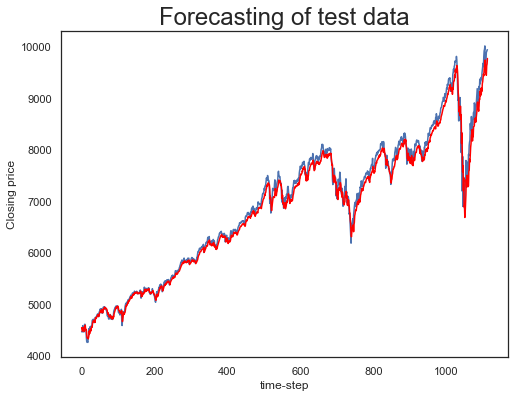

In [717]:
plt.plot(y_test_single_new)
plt.plot(y_test_predict_new, color = 'red')
plt.title("Forecasting of test data", size = 24)
plt.xlabel("time-step")
plt.ylabel("Closing price")
plt.show()

In [718]:
#https://stackoverflow.com/questions/47648133/mape-calculation-in-python
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [719]:
mape = mean_absolute_percentage_error(y_test_single_new, y_test_predict_new)
print(mape)

0.23028757122005095
